In [10]:
import pandas as pd
import numpy as np

# Set date range
dates = pd.date_range(start='2022-01-01', periods=24, freq='M')

# Asset classes
asset_classes = ['Stocks', 'Bonds', 'Commodities']

# Empty list to store data
data = []

# Generate synthetic data for each date and asset class
for date in dates:
    for asset in asset_classes:
        asset_return = np.random.uniform(-2, 2)  # Asset return between -2% and 2%
        volatility = np.random.uniform(1, 15)  # Volatility between 1% and 15%
        interest_rate = np.random.uniform(1, 5)  # Interest rate between 1% and 5%
        inflation = np.random.uniform(1, 3)  # Inflation between 1% and 3%
        gdp_growth = np.random.uniform(1, 4)  # GDP growth between 1% and 4%
        allocation = np.random.uniform(10, 50)  # Portfolio allocation between 10% and 50%
        # Append the row to the data list
        data.append([date, asset, asset_return, volatility, interest_rate, inflation, gdp_growth, allocation])

# Create a DataFrame
portfolio_df = pd.DataFrame(data, columns=['Date', 'Asset Class', 'Asset Return (%)', 'Volatility (%)', 'Interest Rate (%)', 'Inflation (%)', 'GDP Growth (%)', 'Portfolio Allocation (%)'])

# Show sample
print(portfolio_df.head())

        Date  Asset Class  Asset Return (%)  Volatility (%)  \
0 2022-01-31       Stocks         -0.878069        2.481376   
1 2022-01-31        Bonds         -0.902225        9.607346   
2 2022-01-31  Commodities          0.322928        7.152188   
3 2022-02-28       Stocks         -0.337448        6.600915   
4 2022-02-28        Bonds          0.827994       11.503559   

   Interest Rate (%)  Inflation (%)  GDP Growth (%)  Portfolio Allocation (%)  
0           1.638163       1.148261        2.343408                 33.669781  
1           1.322798       1.490557        1.071060                 12.871857  
2           1.151988       2.112400        1.282331                 47.783238  
3           2.677052       2.311672        1.756169                 26.170926  
4           1.553812       2.245838        1.088873                 39.501144  


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_15468\81927054.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2022-01-01', periods=24, freq='M')


In [11]:
# Pivot the DataFrame to have one row per date, with asset returns and allocations for each asset class
pivoted_df = portfolio_df.pivot(index='Date', columns='Asset Class', values=['Asset Return (%)', 'Portfolio Allocation (%)'])
pivoted_df.columns = ['_'.join(col).strip() for col in pivoted_df.columns.values]  # Flatten multi-index columns
pivoted_df.reset_index(inplace=True)

# Create target variable: Portfolio return (weighted sum of asset returns)
pivoted_df['Portfolio Return'] = (pivoted_df['Asset Return (%)_Stocks'] * pivoted_df['Portfolio Allocation (%)_Stocks'] +
                                  pivoted_df['Asset Return (%)_Bonds'] * pivoted_df['Portfolio Allocation (%)_Bonds'] +
                                  pivoted_df['Asset Return (%)_Commodities'] * pivoted_df['Portfolio Allocation (%)_Commodities']) / 100

# Show sample with target variable
print(pivoted_df[['Date', 'Portfolio Return']].head())

        Date  Portfolio Return
0 2022-01-31         -0.257472
1 2022-02-28         -0.199747
2 2022-03-31         -0.118827
3 2022-04-30         -0.750774
4 2022-05-31          0.557008


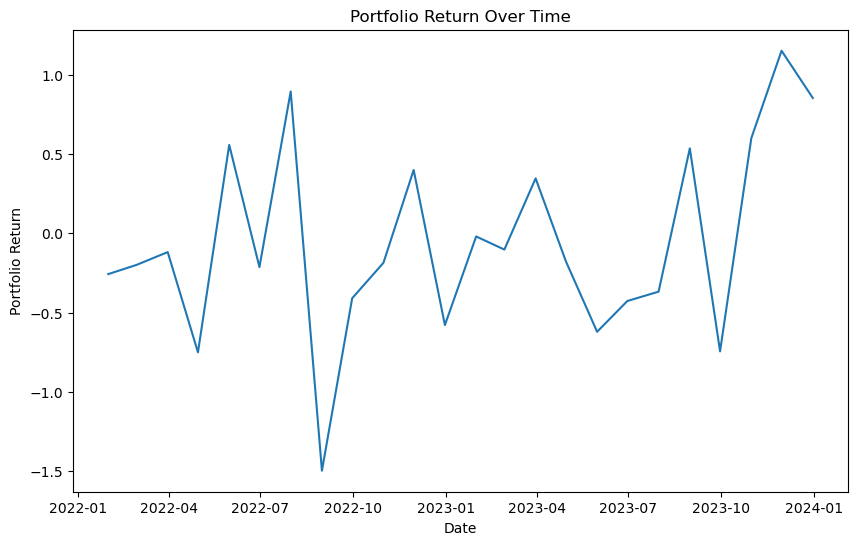

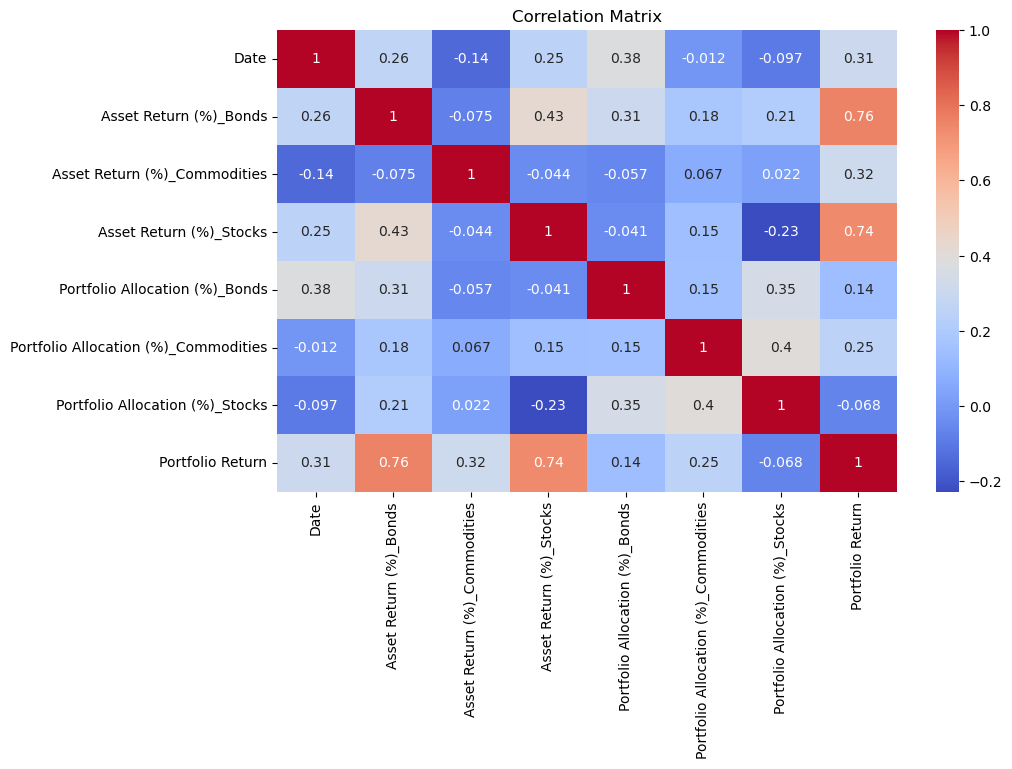

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot portfolio return over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Portfolio Return', data=pivoted_df)
plt.title('Portfolio Return Over Time')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivoted_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Add rolling averages for asset returns (window of 3 months)
pivoted_df['Rolling Avg Stocks'] = pivoted_df['Asset Return (%)_Stocks'].rolling(window=3).mean()
pivoted_df['Rolling Avg Bonds'] = pivoted_df['Asset Return (%)_Bonds'].rolling(window=3).mean()
pivoted_df['Rolling Avg Commodities'] = pivoted_df['Asset Return (%)_Commodities'].rolling(window=3).mean()

# Drop rows with missing rolling average data
pivoted_df.dropna(inplace=True)

print(pivoted_df.head())

        Date  Asset Return (%)_Bonds  Asset Return (%)_Commodities  \
2 2022-03-31                1.406013                     -0.954583   
3 2022-04-30               -1.084015                     -0.343714   
4 2022-05-31               -0.550893                      1.587425   
5 2022-06-30               -0.306325                      0.074188   
6 2022-07-31                1.543723                      1.971931   

   Asset Return (%)_Stocks  Portfolio Allocation (%)_Bonds  \
2                -0.250028                       25.532876   
3                -1.719811                       20.676496   
4                 1.926732                       13.444027   
5                -0.574152                       24.964461   
6                 0.469983                       24.951766   

   Portfolio Allocation (%)_Commodities  Portfolio Allocation (%)_Stocks  \
2                             41.253289                        33.606721   
3                             30.183841               

In [14]:
print(pivoted_df.columns)

Index(['Date', 'Asset Return (%)_Bonds', 'Asset Return (%)_Commodities',
       'Asset Return (%)_Stocks', 'Portfolio Allocation (%)_Bonds',
       'Portfolio Allocation (%)_Commodities',
       'Portfolio Allocation (%)_Stocks', 'Portfolio Return',
       'Rolling Avg Stocks', 'Rolling Avg Bonds', 'Rolling Avg Commodities'],
      dtype='object')


In [15]:
# Pivot the DataFrame to have one row per date, with asset returns and allocations for each asset class
pivoted_df = portfolio_df.pivot(index='Date', columns='Asset Class', values=[
    'Asset Return (%)', 'Portfolio Allocation (%)', 'Volatility (%)', 'Interest Rate (%)', 'Inflation (%)', 'GDP Growth (%)'
])

# Flatten multi-index columns
pivoted_df.columns = ['_'.join(col).strip() for col in pivoted_df.columns.values]
pivoted_df.reset_index(inplace=True)

# Check the column names
print(pivoted_df.columns)

Index(['Date', 'Asset Return (%)_Bonds', 'Asset Return (%)_Commodities',
       'Asset Return (%)_Stocks', 'Portfolio Allocation (%)_Bonds',
       'Portfolio Allocation (%)_Commodities',
       'Portfolio Allocation (%)_Stocks', 'Volatility (%)_Bonds',
       'Volatility (%)_Commodities', 'Volatility (%)_Stocks',
       'Interest Rate (%)_Bonds', 'Interest Rate (%)_Commodities',
       'Interest Rate (%)_Stocks', 'Inflation (%)_Bonds',
       'Inflation (%)_Commodities', 'Inflation (%)_Stocks',
       'GDP Growth (%)_Bonds', 'GDP Growth (%)_Commodities',
       'GDP Growth (%)_Stocks'],
      dtype='object')


In [16]:
# Calculate rolling averages for each asset's returns (3-month window)
pivoted_df['Rolling Avg Stocks'] = pivoted_df['Asset Return (%)_Stocks'].rolling(window=3).mean()
pivoted_df['Rolling Avg Bonds'] = pivoted_df['Asset Return (%)_Bonds'].rolling(window=3).mean()
pivoted_df['Rolling Avg Commodities'] = pivoted_df['Asset Return (%)_Commodities'].rolling(window=3).mean()

# Drop rows with missing rolling averages
pivoted_df.dropna(inplace=True)

# Check if the rolling average columns are created
print(pivoted_df[['Rolling Avg Stocks', 'Rolling Avg Bonds', 'Rolling Avg Commodities']].head())

   Rolling Avg Stocks  Rolling Avg Bonds  Rolling Avg Commodities
2           -0.488515           0.443927                -0.777142
3           -0.769096           0.383331                -0.999356
4           -0.014369          -0.076298                 0.096376
5           -0.122411          -0.647078                 0.439300
6            0.607521           0.228835                 1.211181


In [19]:
# Define the feature set (X) and the target (y)
X = pivoted_df[['Asset Return (%)_Stocks', 'Asset Return (%)_Bonds', 'Asset Return (%)_Commodities',
                'Volatility (%)_Stocks', 'Volatility (%)_Bonds', 'Volatility (%)_Commodities',
                'Interest Rate (%)_Stocks', 'Interest Rate (%)_Bonds', 'Interest Rate (%)_Commodities',
                'Inflation (%)_Stocks', 'Inflation (%)_Bonds', 'Inflation (%)_Commodities',
                'GDP Growth (%)_Stocks', 'GDP Growth (%)_Bonds', 'GDP Growth (%)_Commodities',
                'Rolling Avg Stocks', 'Rolling Avg Bonds', 'Rolling Avg Commodities']]

y = pivoted_df['Portfolio Return']

KeyError: 'Portfolio Return'

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict portfolio returns on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

NameError: name 'y' is not defined

In [21]:
# Display the coefficients of the linear regression model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

NameError: name 'model' is not defined